In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path='/content/gdrive/MyDrive/Colab Notebooks/Learning machine and deep learning in clinical diagnostics/AMI_GSE66360_series_matrix.csv'
df=pd.read_csv(path,encoding='latin1') #Added encoding suitable for receiving the table
df

<ipython-input-89-9f86cc4fa007>:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path,encoding='latin1') #Added encoding suitable for receiving the table


,"!Series_title\t""A Whole Blood Molecular Signature for the Identification of Acute Myocardial Infarction Without Relying Upon Myonecrosis (microarray)""",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
0,"!Series_geo_accession\t""GSE66360""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"!Series_status\t""Public on Feb 28 2015""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"!Series_submission_date\t""Feb 27 2015""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"!Series_last_update_date\t""Dec 27 2017""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"!Series_summary\t""Despite the significant redu...",CVD still accounts for a third of all deaths ...,dyslipidemia,diabetes mellitus,cigarette smoking,inactivity) remain the focus of primary preve...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54730,AFFX-ThrX-5_at,3.139334,3.039961,3.220109,3.263782,3.138524,3.043079,3.231108,3.304716,3.384011,...,3.525011,3.30903,3.6634,3.324005,4.619261,5.55878,3.416999,3.699181,3.48528,4.211922
54731,AFFX-ThrX-M_at,2.747015,2.638606,2.495261,2.544199,2.50663,2.817982,2.52506,2.917278,2.643849,...,2.930794,2.745955,3.165168,2.899104,4.066776,5.429437,2.834741,3.249683,2.711413,3.346835
54732,AFFX-TrpnX-3_at,2.651554,2.643615,2.626028,2.504958,2.609707,2.52161,2.840601,2.509774,2.69682,...,2.788852,2.725247,3.143401,2.768755,3.546117,4.48794,2.782356,3.056727,2.833818,3.069542
54733,AFFX-TrpnX-5_at,3.413429,3.399063,3.53997,3.396225,3.43472,3.51609,3.514949,3.475952,3.495199,...,3.701271,3.456717,4.127459,3.668327,4.889324,4.254286,3.88208,3.649827,3.52341,4.108475


# **Preprocessing**

In [ ]:
df.drop(range(0, 58), axis=0, inplace=True)

In [ ]:
df.columns = df.iloc[1]
df.set_index('ID_REF', inplace=True)
df = df.drop(["ID_REF"],axis=0)
df.index=df.index.map(lambda x: x.split('_at')[0]) #Editing the name of the genes
df

59,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
ID_REF,,,,,,,,,,,,,,,,,,,,,
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1007_s,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,6.016415473,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
1053,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,7.580840863,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
117,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,6.307065808,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
121,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,5.971847425,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5,3.139334,3.039961,3.220109,3.263782,3.138524,3.043079,3.231108,3.304716,3.384011,3.139504,...,3.525011,3.30903,3.6634,3.324005,4.619261,5.55878,3.416999,3.699181,3.48528,4.211922
AFFX-ThrX-M,2.747015,2.638606,2.495261,2.544199,2.50663,2.817982,2.52506,2.917278,2.643849,2.787684,...,2.930794,2.745955,3.165168,2.899104,4.066776,5.429437,2.834741,3.249683,2.711413,3.346835
AFFX-TrpnX-3,2.651554,2.643615,2.626028,2.504958,2.609707,2.52161,2.840601,2.509774,2.69682,2.79354,...,2.788852,2.725247,3.143401,2.768755,3.546117,4.48794,2.782356,3.056727,2.833818,3.069542


In [ ]:
df=df.T
target_column="Class"
first_col = df.pop(target_column)
df[target_column] = first_col

<ipython-input-92-7965ea812d62>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[target_column] = first_col


In [ ]:
print(df.isna().sum().sum())
df=df.dropna(axis=1)

47


In [ ]:
df

ID_REF,1007_s,1053,117,121,1255_g,1294,1316,1320,1405_i,1431,...,AFFX-r2-Ec-bioD-5,AFFX-r2-P1-cre-3,AFFX-r2-P1-cre-5,AFFX-ThrX-3,AFFX-ThrX-5,AFFX-ThrX-M,AFFX-TrpnX-3,AFFX-TrpnX-5,AFFX-TrpnX-M,Class
59,,,,,,,,,,,,,,,,,,,,,
GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,10.742427,7.270560667,...,13.266235,14.57123,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612,H
GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,9.865655308,4.810194735,...,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691,H
GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,10.148454,7.822844272,...,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.53997,3.698396,H
GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,10.87991277,5.690417407,...,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612,H
GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,10.09052505,7.089369391,...,13.330192,14.548389,14.263677,4.562883,3.138524,2.50663,2.609707,3.43472,3.577649,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1620913,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,5.375997385,6.133231971,...,5.942308,7.290514,8.988511,5.567947,5.55878,5.429437,4.48794,4.254286,5.375811,M
GSM1620914,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,9.613538724,3.89680742,...,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.88208,3.744138,M
GSM1620915,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,9.312493837,5.545193595,...,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536,M


In [ ]:
print(df.dtypes.value_counts())
df.iloc[:, :-1] = df.iloc[:, :-1].apply(pd.to_numeric, errors='coerce') #Convert the table column other than the target to numeric
df = df.convert_dtypes(convert_string=True)
print(df.dtypes.value_counts())


object    54629
dtype: int64
Float64    54628
string         1
dtype: int64


In [ ]:
df.loc['std'] = df.std()
print(df.loc['std'])
print(df.loc['std'].isna().sum()) # The 1 belongs to H/M

<ipython-input-96-944a8aff7b60>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.loc['std'] = df.std()


ID_REF
1007_s          0.591152
1053            0.845915
117              1.03837
121             0.476802
1255_g          0.318438
                  ...   
AFFX-ThrX-M     0.637562
AFFX-TrpnX-3    0.338735
AFFX-TrpnX-5    0.520216
AFFX-TrpnX-M    0.446502
Class               <NA>
Name: std, Length: 54629, dtype: object
1


In [ ]:
dfT=df.T
dfT = pd.concat([dfT.loc[(dfT['std'] > dfT['std'].quantile(0.99))], dfT.iloc[[-1]]])
df=dfT.T
df.drop(['std'],axis=0, inplace=True)
df

ID_REF,1552582,1552708_a,1552772,1552773,1552790_a,1553226,1553260_s,1553297_a,1553588,1553886,...,244507,244612,244723,244829,39402,44783_s,AFFX-r2-Ec-bioD-5,AFFX-r2-P1-cre-3,AFFX-r2-P1-cre-5,Class
59,,,,,,,,,,,,,,,,,,,,,
GSM1620819,4.875251,4.307038,4.40106,6.516728,8.97807,4.434245,2.877405,8.006324,13.173689,4.150123,...,6.593332,7.718223,6.018229,4.656702,9.958328,5.957345,13.266235,14.57123,14.276568,H
GSM1620820,7.529864,7.252442,5.88939,6.425118,9.169305,3.033482,5.401194,8.396355,13.338125,5.879938,...,6.858516,9.661256,9.15329,5.446211,8.099267,7.352554,13.517013,14.738834,14.341233,H
GSM1620821,5.060488,6.122071,3.274352,5.12428,7.662477,3.589676,2.598515,5.506103,13.301231,6.165264,...,5.440201,7.997409,6.185469,4.062878,6.328538,8.017228,13.416583,14.627181,14.318568,H
GSM1620822,3.451899,5.999859,3.515481,3.903001,8.829307,3.290661,3.652359,5.843301,13.297659,4.371569,...,5.950519,8.483699,6.259487,5.268878,7.990168,4.757339,13.494827,14.754124,14.363297,H
GSM1620823,3.336904,3.666419,4.12584,4.408401,8.462319,3.550934,2.850092,7.086494,13.212652,3.152452,...,5.284705,7.128481,6.519021,4.102357,8.61036,7.150752,13.330192,14.548389,14.263677,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1620913,4.060796,5.850881,4.992884,6.682943,5.251832,5.897015,6.976156,5.401649,4.811539,4.111278,...,6.633389,6.847594,7.455262,5.864914,7.646271,6.83146,5.942308,7.290514,8.988511,M
GSM1620914,9.747735,7.622206,8.917108,7.207148,7.983532,10.317546,5.044318,10.293696,13.514539,7.754599,...,8.769498,11.980916,8.968189,8.168523,11.888376,5.717423,14.163706,14.884506,14.792506,M
GSM1620915,7.532173,5.146328,7.321889,9.345034,3.064693,7.930493,4.211304,8.147783,13.540651,2.732167,...,4.37271,8.290313,3.092881,7.443253,10.329368,11.12715,13.682425,14.884506,14.783801,M


In [ ]:
target = df[target_column]
df = df.drop(target_column, axis=1)

corr_matrix  = abs(df.iloc[:, :-1].astype('float').corr())
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # In the correlation matrix there are 2 symmetrical triangles, we will only use the upper one
corr_cols = corr_matrix.columns
to_drop = []
for i in range(len(corr_cols)):
    for j in range(i+1, len(corr_cols)):
        if mask[i, j] and corr_matrix.iloc[i, j] >= 0.9 : #Removing highly correlated columns
            if corr_cols[j] not in to_drop:
                to_drop.append(corr_cols[j])

df = df.drop(to_drop, axis=1)
df[target_column] = target

In [ ]:
df

ID_REF,1552582,1552708_a,1552772,1552773,1552790_a,1553226,1553260_s,1553297_a,1553588,1553886,...,244045,244112_x,244480,244482,244507,244723,244829,44783_s,AFFX-r2-P1-cre-5,Class
59,,,,,,,,,,,,,,,,,,,,,
GSM1620819,4.875251,4.307038,4.40106,6.516728,8.97807,4.434245,2.877405,8.006324,13.173689,4.150123,...,4.918062,4.697851,5.534988,2.776082,6.593332,6.018229,4.656702,5.957345,14.276568,H
GSM1620820,7.529864,7.252442,5.88939,6.425118,9.169305,3.033482,5.401194,8.396355,13.338125,5.879938,...,6.488939,7.542472,8.200839,2.985265,6.858516,9.15329,5.446211,7.352554,14.341233,H
GSM1620821,5.060488,6.122071,3.274352,5.12428,7.662477,3.589676,2.598515,5.506103,13.301231,6.165264,...,3.910529,6.472231,6.533388,2.947744,5.440201,6.185469,4.062878,8.017228,14.318568,H
GSM1620822,3.451899,5.999859,3.515481,3.903001,8.829307,3.290661,3.652359,5.843301,13.297659,4.371569,...,5.153601,5.307481,6.069067,7.549649,5.950519,6.259487,5.268878,4.757339,14.363297,H
GSM1620823,3.336904,3.666419,4.12584,4.408401,8.462319,3.550934,2.850092,7.086494,13.212652,3.152452,...,6.553381,4.605428,5.405635,7.264293,5.284705,6.519021,4.102357,7.150752,14.263677,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1620913,4.060796,5.850881,4.992884,6.682943,5.251832,5.897015,6.976156,5.401649,4.811539,4.111278,...,5.875267,7.710517,8.249075,5.969945,6.633389,7.455262,5.864914,6.83146,8.988511,M
GSM1620914,9.747735,7.622206,8.917108,7.207148,7.983532,10.317546,5.044318,10.293696,13.514539,7.754599,...,6.185646,9.699493,11.815547,4.348109,8.769498,8.968189,8.168523,5.717423,14.792506,M
GSM1620915,7.532173,5.146328,7.321889,9.345034,3.064693,7.930493,4.211304,8.147783,13.540651,2.732167,...,5.246551,4.358336,10.136251,7.404452,4.37271,3.092881,7.443253,11.12715,14.783801,M


# **Building a model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
target_column = 'Class'
target=df[target_column]
data= df.drop(target_column, axis=1)
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=42)

**SVM**

In [ ]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm =svm.predict(x_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Basic model Accuracy:{:.3f}".format(accuracy_svm))

Basic model Accuracy:0.850


In [ ]:
param_grid = {
    'C': [0.1, 1, 10],                              # which controls the trade-off between maximizing the margin and minimizing the classification error.
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],   # controls the width of the radial basis function (RBF) kernel.
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # specifies the type of kernel function to use.
    'degree': [2, 3, 4],                            # used only when kernel is set to 'poly', and it controls the degree of the polynomial kernel function.
    'coef0': [0.0, 0.5, 1.0]                        # only when kernel is set to 'poly' or 'sigmoid', and it controls the independent term in the kernel function.
}
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_svm = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'],
               kernel=grid_search.best_params_['kernel'], degree=grid_search.best_params_['degree'],
               coef0=grid_search.best_params_['coef0'], probability=True) #probability=True for rock curve
print("Best hyperparameters: ", grid_search.best_params_)
best_svm.fit(x_train, y_train)
y_pred_svm = best_svm.predict(x_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Improved model Accuracy:{:.3f}".format(accuracy_svm))

Best hyperparameters:  {'C': 0.1, 'coef0': 0.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Improved model Accuracy:0.950


In [ ]:
"""
Here was an attempt to visually present the operation of the classifier,
since the code did not run smoothly for me and this step was not required,
I chose to give up this possible part.
"""

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.svm import SVC
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(x_train)


# best_svm.fit(X_pca, y_train)
# x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
# y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
# Z = best_svm.predict(np.c_[xx.ravel(), yy.ravel()])
# mesh = np.c_[xx.ravel(), yy.ravel()]
# Z = best_svm.predict(pca.inverse_transform(mesh))


# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('SVM Decision Boundary')
# plt.show()


'\nHere was an attempt to visually present the operation of the classifier,\nsince the code did not run smoothly for me and this step was not required,\nI chose to give up this possible part.\n'

**Random Forest**

In [ ]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Basic model accuracy:{:.3f}".format(accuracy_rfc))

Basic model accuracy:0.900


In [ ]:
rfc = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 150, 200],     # Number of decision trees in the random forest.
    'max_depth': [2, 3],                 # This is the maximum depth of each decision tree in the random forest.
    'min_samples_split': [2, 3],         # The minimum number of samples required to split an internal node of the decision tree.
    'min_samples_leaf': [2, 4],          # The minimum number of samples required to be at a leaf node of the decision tree.
    'max_features': ['sqrt', 'log2']     # Controls the maximum number of features that are considered for splitting each internal node of the decision tree.
}
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_rfc = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                   max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'],
                                   min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                   max_features=grid_search.best_params_['max_features'],
                                   random_state=0)
print("Best hyperparameters: ", grid_search.best_params_)
best_rfc.fit(x_train, y_train)
y_pred_rfc = best_rfc.predict(x_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Improved model Accuracy:{:.3f}".format(accuracy_rfc))

Best hyperparameters:  {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Improved model Accuracy:0.900


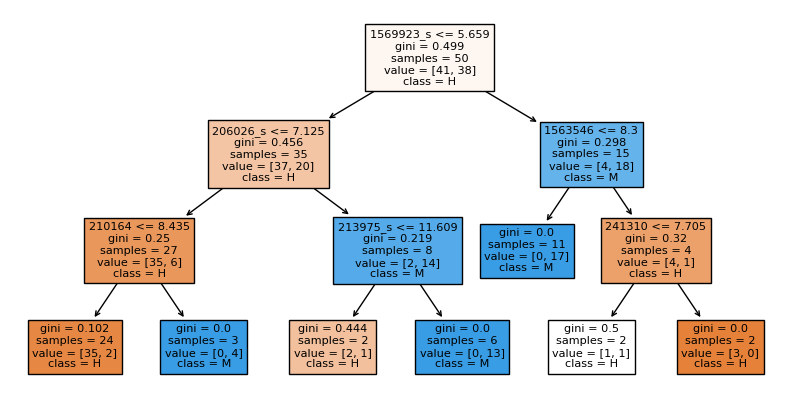

In [ ]:
plt.figure(figsize=(10, 5))
plot_tree(best_rfc.estimators_[0], feature_names=data.columns, class_names=best_rfc.classes_, filled=True)
plt.show()

# **performance appraisal**

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve

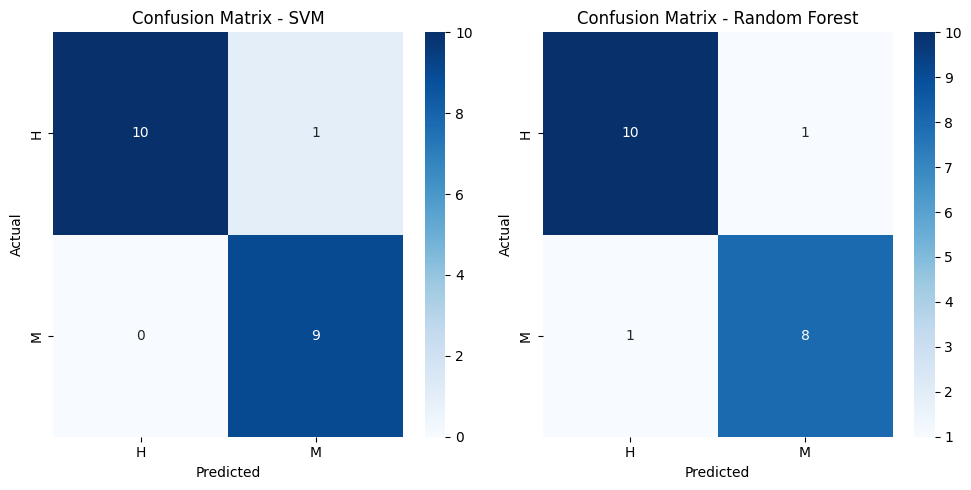

In [ ]:
models = {'SVM': y_pred_svm, 'Random Forest': y_pred_rfc}
labels = ['H', 'M']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, (model_name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, cmap='Blues', ax=axs[i], xticklabels=labels, yticklabels=labels)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
    axs[i].set_title(f'Confusion Matrix - {model_name}')

plt.tight_layout()
plt.show()


In [ ]:
y_test_numeric = np.where(y_test=='M', 1, 0) # convert y_test and prediction arrays to numeric values
Comparing_models = pd.DataFrame(columns=['Recall', 'Accuracy', 'Precision', 'F1 Score', 'ROC AUC'])

# loop through each model's predictions
for i, prediction in enumerate([y_pred_svm, y_pred_rfc]):
     prediction_numeric = np.where(prediction=='M', 1, 0)
     # calculate performance metrics
     model_name = 'SVM' if i==0 else 'Random Forest'
     Comparing_models.loc[model_name] = [
         recall_score(y_test_numeric, prediction_numeric, pos_label=1),
         accuracy_score(y_test_numeric, prediction_numeric),
         precision_score(y_test_numeric, prediction_numeric, pos_label=1),
         f1_score(y_test_numeric, prediction_numeric, pos_label=1),
         roc_auc_score(y_test_numeric, prediction_numeric)]
Comparing_models = Comparing_models.round(2)
print(Comparing_models)


               Recall  Accuracy  Precision  F1 Score  ROC AUC
SVM              1.00      0.95       0.90      0.95     0.95
Random Forest    0.89      0.90       0.89      0.89     0.90


[0.         0.         0.         0.09090909 0.09090909 1.        ] [0.         0.11111111 0.66666667 0.66666667 1.         1.        ]
[0.         0.         0.         0.09090909 0.09090909 0.27272727
 0.27272727 1.        ] [0.         0.11111111 0.55555556 0.55555556 0.88888889 0.88888889
 1.         1.        ]


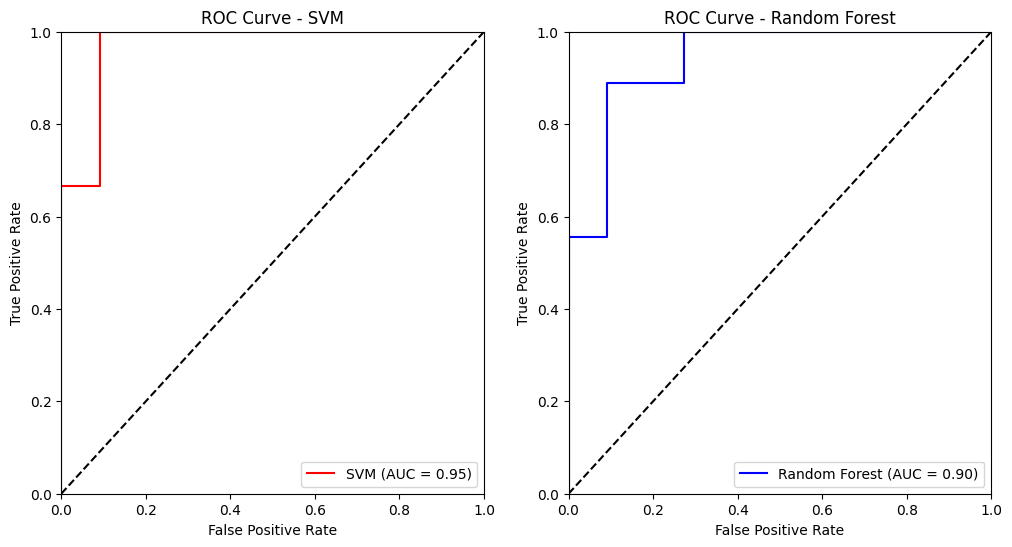

In [ ]:
classifiers = [best_svm, best_rfc]
colors = ['red', 'blue']
labels = ['SVM', 'Random Forest']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

for i, clf in enumerate(classifiers):
    y_score = clf.predict_proba(x_test)[:, 1] #returns a 2D numpy array of shape that contains the probability estimates for each sample in the test data.
    y_pred = clf.predict(x_test)
    prediction_numeric = np.where(y_pred=='M', 1, 0)
    fpr, tpr, _ = roc_curve(y_test_numeric, y_score) #calculates the false positive rate (fpr), true positive rate (tpr), and decision thresholds (_) for the binary classification problem using the input arrays.
    print(fpr, tpr)
    roc_auc = roc_auc_score(y_test_numeric, prediction_numeric)
    ax = ax1 if i == 0 else ax2
    ax.plot(fpr, tpr, color=colors[i], label='%s (AUC = %0.2f)' % (labels[i], roc_auc))
    ax.plot([0, 1], [0, 1], color='black', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve - %s' % labels[i])
    ax.legend(loc="lower right")

plt.show()
